In [1]:
#  IMPORT LIBRARIES
import pandas as pd   # For data manipulation and analysis
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt   # For visualization
%matplotlib inline                 # Display plots inline in Jupyter
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)      # Set default plot size
import warnings
warnings.filterwarnings("ignore")         # Ignore warnings for clean output

1. Loading the Dataset

ML Process: Exploratory Data Analysis (EDA)

Checking the data structure, number of rows and columns (shape).

Inspecting first few rows (head).

Understanding categorical distribution like area_type.

In [137]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
# Purpose: Initial exploratory analysis to understand data structure and categorical distributions.
# We check number of rows, columns, and distribution of area_type to understand dataset.
df1.groupby("area_type")["area_type"].agg("count")    # Count number of entries per area type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

2. Dropping Unnecessary Columns

ML Process: Data Preprocessing (Feature Selection + Missing Values Check)

Dropping irrelevant features that won’t be useful for prediction.

Checking missing values (isnull()).

In [5]:
# DROP UNNECESSARY COLUMNS
# Purpose: Drop columns not useful for prediction to simplify the model.
# Checking missing values helps in identifying rows/columns needing cleaning.
df2 = df1.drop(["area_type","society","balcony","availability"],axis = "columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

3. Handling Missing Data

ML Process: Data Cleaning

Removing rows with missing values.

In [7]:
# HANDLE MISSING DATA
# Purpose: We remove rows with missing values to prevent errors in ML models.
# Alternative methods like imputation could be used, but dropping is safe for this dataset size.
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

4. Feature Engineering (BHK Column)

ML Process: Feature Engineering

Creating numerical features (bhk) from categorical/text features (size).

Detecting outliers (BHK > 20).

In [150]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# FEATURE ENGINEERING - BHK COLUMN
# Create numeric 'bhk' column from 'size' (e.g., "2 BHK" -> 2)
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))

In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
 # Detect unrealistic outliers
# Purpose: Machine learning models require numeric inputs. 
# We extract number of bedrooms from text. Outlier check ensures unrealistic entries are removed.
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


5. Handling total_sqft as Numerical

ML Process: Data Cleaning / Preprocessing

Identifying entries in total_sqft that are non-numeric.

In [183]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# CLEANING 'total_sqft'
def is_float(x):
    """Check if a string can be converted to float"""
    try:
        float(x)
        return True
    except:
        return False


In [16]:
# Show entries where total_sqft is not a float
# Purpose: Some entries in 'total_sqft' are ranges or text (e.g., "2100-2850", "34.46Sq. Meter")
# We need to convert all into numeric values for ML.
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


7. Converting total_sqft to Numeric

ML Process: Feature Engineering & Data Cleaning

Converting ranges and strings into numeric values.

Example: "2100-2850" → 2475.

In [17]:
 #CONVERT 'total_sqft' TO NUMERIC
def convert_sqft_to_num(x):
    """Convert total_sqft to numeric value.
       Handles ranges and units like 'Sq. Meter' or 'Sq. Yards'"""
    tokens = str(x).split("_")  
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
        # Purpose: Ensure 'total_sqft' is numeric so ML algorithms can process it.


In [18]:
convert_sqft_to_num(2166)

2166.0

In [19]:
convert_sqft_to_num(2100 - 2850)

-750.0

In [20]:
convert_sqft_to_num("34.46Sq. Meter")

In [21]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft          NaN
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df4.at[30, 'total_sqft'] = convert_sqft_to_num('2100_2850')


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


7. Creating price_per_sqft

ML Process: Feature Engineering

Adding a new feature to help detect outliers (price_per_sqft).

In [26]:
df5 = df4.copy()

In [27]:
# Purpose: Price per square foot is useful to detect anomalies and outliers.
# It's also a meaningful feature for comparing houses of different sizes.
df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


8. Handling location

ML Process: Categorical Feature Processing

Stripping spaces and grouping rare locations into "other" to avoid high dimensionality.

In [28]:
len(df5.location.unique())

1304

In [29]:
# Remove trailing spaces
df5.location =df5.location.apply(lambda x: x.strip())
# Count of houses in each location
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
# Locations with very few data points are grouped as 'other'
location_stats
# Purpose: One-hot encoding will create a column per location. Grouping rare locations as 'other'
# avoids too many sparse columns (dimensionality problem).

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_stats[location_stats<=10])

1052

In [31]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
len(df5.location.unique())

1293

In [33]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [34]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [35]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
df5.shape

(13246, 7)

9. Removing Outliers

ML Process: Data Cleaning / Outlier Removal

Removing unrealistic house sizes per BHK.

Removing price per sqft outliers.

Removing bathroom outliers (e.g., more bathrooms than BHK + 2).

In [37]:
# Remove unrealistic sizes per BHK
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [38]:
df6.price_per_sqft.describe()

count     12313.000000
mean       6323.500301
std        4187.054780
min         267.829813
25%        4208.754209
50%        5300.000000
75%        6939.625260
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
# Remove price per sqft outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape


(10141, 7)

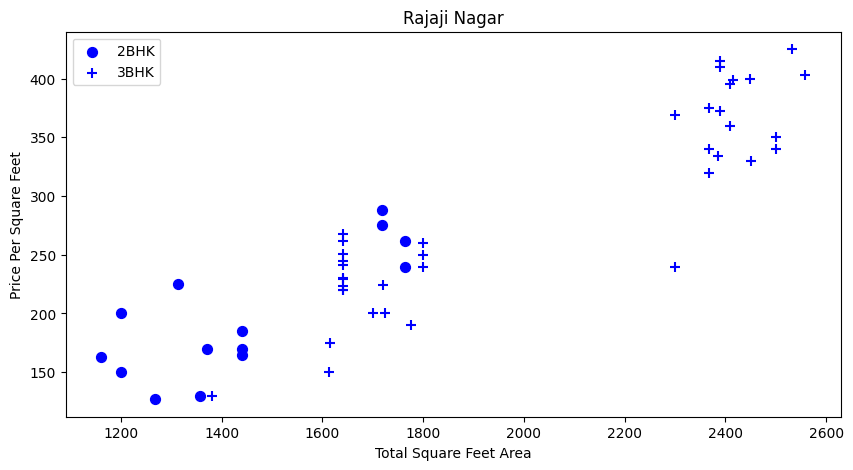

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ="blue",label="2BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = "+",color ="blue",label="3BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")

In [41]:
# Remove BHK vs price outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats["count"] > 5:
                
                condition = bhk_df.price_per_sqft < stats["mean"]
                exclude_indices = np.append(exclude_indices, bhk_df[condition].index.values)

    return df.drop(exclude_indices, axis="index")

df8 = remove_bhk_outliers(df7)
df8.shape


(7218, 7)

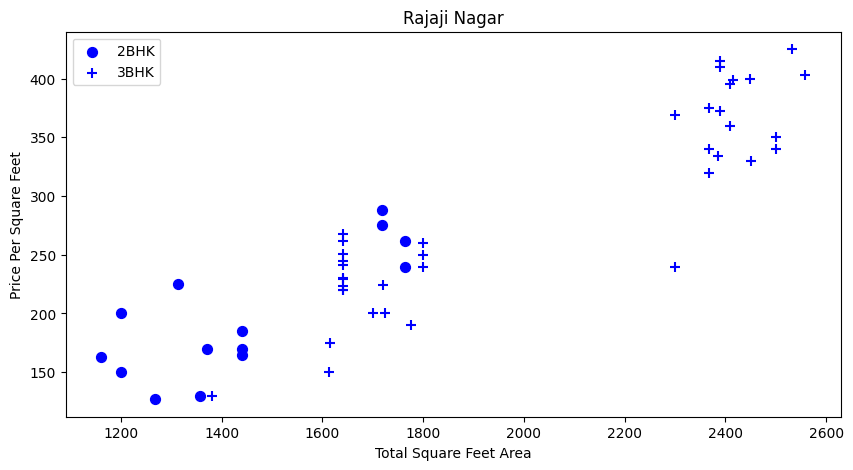

In [42]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

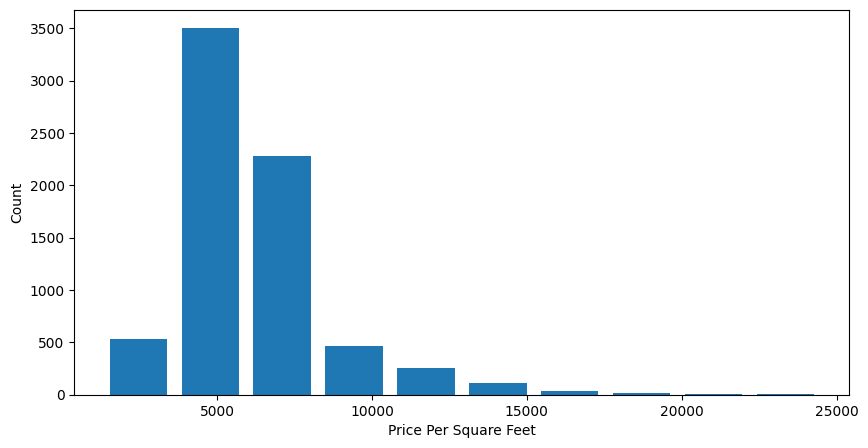

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(10,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5221,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8389,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8478,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9211,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9540,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

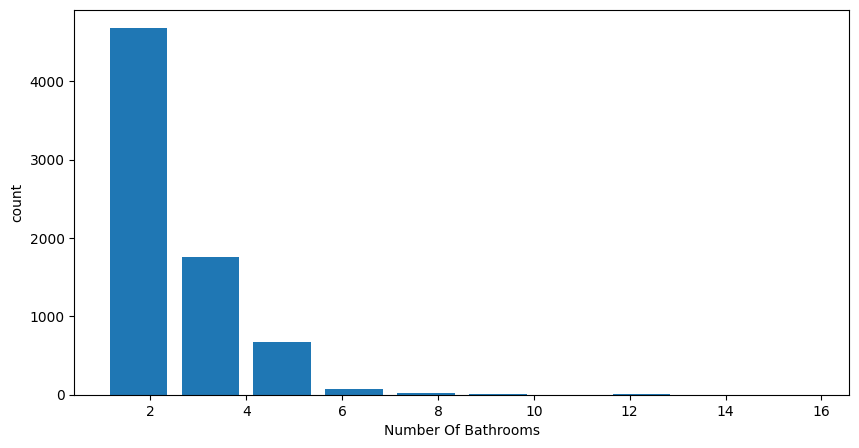

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("count")

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5182,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6639,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8314,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
# Remove unrealistic bathroom counts
#Purpose: Outlier removal ensures ML models are not skewed by extreme values.
# We remove unrealistic BHK sizes, price per sqft, and bathrooms.
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7145, 7)

10. Dropping Unneeded Columns

ML Process: Data Preprocessing

Dropping intermediate columns after feature extraction.

In [49]:
df10 = df9.drop(["size","price_per_sqft"],axis="columns")
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


11. One-Hot Encoding Locations

ML Process: Feature Engineering / Categorical Encoding

Convert categorical location into numeric dummy variables.

In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df11 = pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df12 = df11.drop("location",axis="columns")
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12.shape

(7145, 245)

12. Preparing Features & Labels

ML Process: Data Preprocessing

Separating features (X) and target (y).

 Purpose: ML models require numeric input. 
One-hot encoding converts 'location' to numeric format.
 'X' contains features, 'y' is target variable.

In [186]:
X = df12.drop("price",axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

13. Train-Test Split

ML Process: Data Splitting

Splitting into training and testing sets for model evaluation.

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

14. Linear Regression Model

 Why Linear Regression?
 - Predicting house price is a regression problem (continuous output)
 - Linear Regression is simple, interpretable, and works well when relationship is approximately linear
 - Other models like Lasso/Ridge can be used for regularization if needed
 - Decision Trees or Random Forest can be used if non-linear relationships dominate
 - Here, LR is chosen first for simplicity and interpretability

ML Process: Model Training & Evaluation

Train Linear Regression and check R² score.

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)        # Train model
lr_clf.score(X_test,y_test)          # Evaluate R^2 score

0.8809091536718423

15. Cross-Validation

ML Process: Model Evaluation (Cross-Validation)

Evaluate model stability across multiple splits.

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import  cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.83654209, 0.86857787, 0.87121475, 0.85034735, 0.85956048])

16. Grid Search for Best Model

ML Process: Model Selection & Hyperparameter Tuning

Compare Linear Regression, Lasso, Decision Tree to find the best parameters.

In [59]:
# Purpose: Compare different regression algorithms and tune hyperparameters.
# Allows us to select the most suitable model for prediction.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
       "linear_regression":{
          "model":LinearRegression(),
          "params":{
            "fit_intercept":[True, False]
         }
    },

        "lasso":{
            "model": Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
       "decision_tree":{
    "model": DecisionTreeRegressor(),
    "params":{
        "criterion":["squared_error","friedman_mse"],
        "splitter":["best","random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"], cv=cv,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores,columns = ["model","best_score","best_params"])
find_best_model_using_gridsearchcv(X,y)




,model,best_score,best_params
0,linear_regression,0.857506,{'fit_intercept': False}
1,lasso,0.697736,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.755439,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


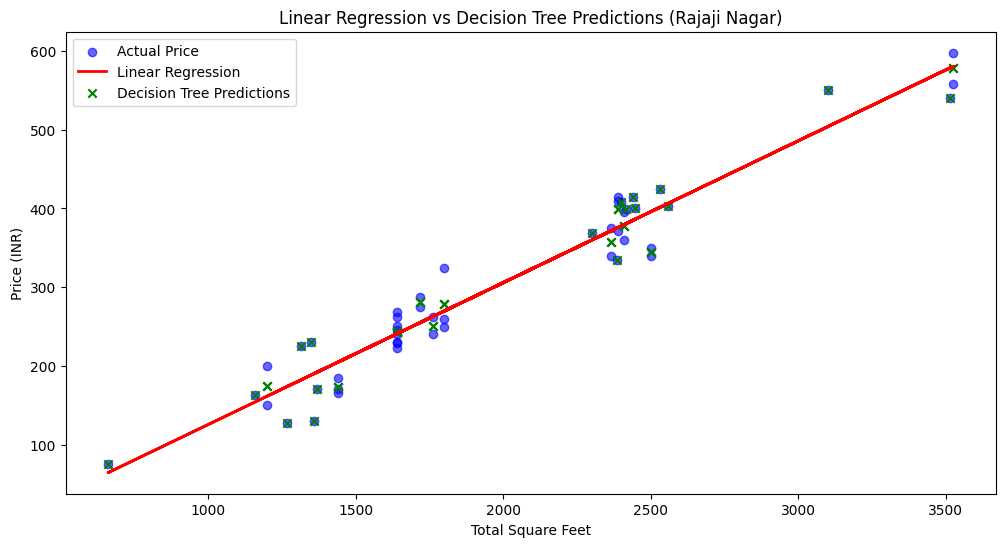

In [179]:

# VISUAL COMPARISON: LINEAR REGRESSION VS DECISION TREE

# Use a single location for clarity
location = "Rajaji Nagar"
df_plot = df9[df9.location == location]  # Cleaned data for that location

X_plot = df_plot.total_sqft.values.reshape(-1,1)
y_plot = df_plot.price.values

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_plot, y_plot)
y_lr_pred = lr_model.predict(X_plot)

# --- Decision Tree ---
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_plot, y_plot)
y_dt_pred = dt_model.predict(X_plot)

# --- PLOT ---
plt.figure(figsize=(12,6))
plt.scatter(X_plot, y_plot, color='blue', label='Actual Price', alpha=0.6)
plt.plot(X_plot, y_lr_pred, color='red', label='Linear Regression', linewidth=2)
plt.scatter(X_plot, y_dt_pred, color='green', marker='x', label='Decision Tree Predictions')
plt.xlabel("Total Square Feet")
plt.ylabel("Price (INR)")
plt.title(f"Linear Regression vs Decision Tree Predictions ({location})")
plt.legend()
plt.show()


In [60]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [61]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index.size > 0:
        x[loc_index[0]] = 1

    
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_clf.predict(x_df)[0]


In [ ]:

# NEW INPUT DATA FOR PREDICTION WITH CRORE/LAKH CONVERSION

#  Take input from user

new_sqft = float(input("Enter total square feet area of the house: "))
new_bath = int(input("Enter number of bathrooms: "))
new_bhk = int(input("Enter number of bedrooms (BHK): "))
new_location = input("Enter location of the house: ").strip()

#  Create input vector for prediction

x_new = np.zeros(len(X.columns))
x_new[0] = new_sqft
x_new[1] = new_bath
x_new[2] = new_bhk

# Handle location dummy
loc_index = np.where(X.columns == new_location)[0]
if loc_index.size > 0:
    x_new[loc_index[0]] = 1

x_new_df = pd.DataFrame([x_new], columns=X.columns)


#  Predict house price

predicted_price = lr_clf.predict(x_new_df)[0]  # Model predicts in Lakhs

#  Convert to Crore/Lakh for better readability

if predicted_price >= 100:  # 100 lakh = 1 crore
    price_in_cr = predicted_price / 100
    print(f"Predicted house price: ₹{price_in_cr:.2f} Cr")
else:
    print(f"Predicted house price: ₹{predicted_price:.2f} Lakh")


